In [326]:
import numpy as np

# Define the number of samples and the sampling interval
N = 5
T = 1.0 / N

# Compute the discrete time samples of the function
x = np.linspace(0, N*T, N)
y = np.sin(x)

# Compute the FFT of the function
# la inversa contiene la division por N, pero aqui quiero utilizarla directamente
yf = np.fft.fft(y) / np.sqrt(N)
# de esta forma sera equivalente a las respuestas mediante matrix W

# matrix de fourier compleja
W = np.zeros((N, N), dtype=np.complex_)
for k in range(N):
    for n in range(N):        
        W[n,k] = 1.0/np.sqrt(N) * np.exp(1.0j * 2*np.pi * n * k /N)

# matrix de fourier compleja
W_inv = np.zeros((N, N), dtype=np.complex_)
for k in range(N):
    for n in range(1,N):        
        W_inv[n,k] = 1.0/np.sqrt(N) * np.exp(-1.0j * 2*np.pi * n * k /N)

# matriz para las ecuaciones de minimum squares
U = np.zeros((N, 3))
for n in range(N):    
    U[n, 0] = 1
    U[n, 1] = np.cos(-2 * np.pi * k * n / N)
    U[n, 2] = np.sin(-2 * np.pi * k * n / N)


In [324]:
U

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ],
       [ 1.        , -0.        ,  0.30901699, -0.95105652, -0.80901699,
        -0.58778525, -0.80901699,  0.58778525,  0.30901699,  0.95105652,
         0.        ,  0.        ],
       [ 1.        , -0.        , -0.80901699, -0.58778525,  0.30901699,
         0.95105652,  0.30901699, -0.95105652, -0.80901699,  0.58778525,
         0.        ,  0.        ],
       [ 1.        , -0.        , -0.80901699,  0.58778525,  0.30901699,
        -0.95105652,  0.30901699,  0.95105652, -0.80901699, -0.58778525,
         0.        ,  0.        ],
       [ 1.        , -0.        ,  0.30901699,  0.95105652, -0.80901699,
         0.58778525, -0.80901699, -0.58778525,  0.30901699, -0.95105652,
         0.        ,  0.        ]])

In [321]:
# mientras que la inversa con
ck = W_inv @ y
ck

array([ 0.        +0.j        , -0.26959819+0.30582669j,
       -0.23350352+0.07015334j, -0.23350352-0.07015334j,
       -0.26959819-0.30582669j])

In [302]:
# esot es quivalente
np.all((W @ yf) == np.dot(W, yf))

True

In [327]:
UT = np.matrix.transpose(U)

# se resuelve mediante Minimos cuadrados
estimate_fourier_viaLS = ( np.linalg.inv(UT @ U) @ UT) @ y

estf = estimate_fourier_viaLS[:, np.newaxis]
# estf.shape

# reconstruye con minimos, cuadrados
y_rec_ls = U @ estf

In [304]:
# la transformada de Fourier DFT
ck = W_inv @ y
y_rec_fft =  W @ ck

# o la FFT de numpy
ck = np.fft.fft(y)
y_rec_numpy = np.fft.ifft(ck)

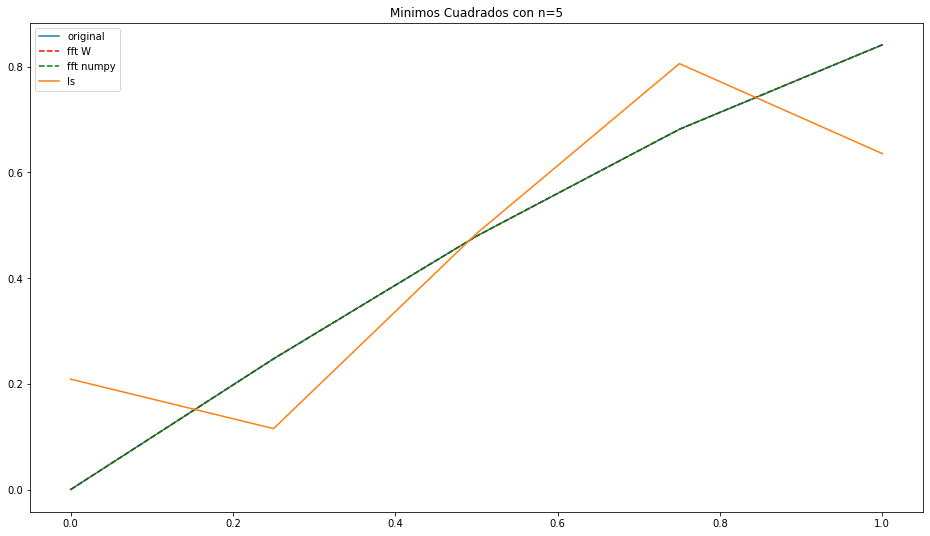

In [306]:
fig,ax = plt.subplots(figsize=(16,9))
plt.plot(x,y, label='original')
plt.plot(x, y_rec_fft.real,'r--', label='fft W')
plt.plot(x, y_rec_numpy.real,'g--', label='fft numpy')
plt.plot(x, y_rec_ls, label='ls')
plt.legend()
plt.title(f'Minimos Cuadrados con n={N}')
plt.show()
plt.ioff()

In [104]:
# comparar coeficientes 
fyerr= np.max(np.abs(estf - yf))
print('diferencia entre FFT y LeastSqaures',fyerr)

diferencia entre FFT y LeastSqaures 22.010582010582006


## codigo de prueba

In [79]:

import numpy

# points in time series
n= 101
# final time (initial time is 0)
tfin= 10

# *end of changeable parameters*

# stepsize
dt= tfin/(n-1)
# sample count
s= numpy.arange(n)
# signal; somewhat arbitrary
y= numpy.sinc(dt*s)
# DFT
fy= numpy.fft.fft(y)
# frequency spectrum in rad/sample
wps= numpy.linspace(0,2*numpy.pi,n+1)[:-1]

# basis for DFT
# see, e.g., http://en.wikipedia.org/wiki/Discrete_Fourier_transform#equation_Eq.2
# and section "Properties -> Orthogonality"; the columns of 'basis' are the u_k vectors
# described there
basis= 1.0/n*numpy.exp(1.0j * wps * s[:,numpy.newaxis])

# reconstruct signal from DFT coeffs and basis
recon_y= numpy.dot(basis,fy)

# expect yerr to be "small"
yerr= numpy.max(numpy.abs(y-recon_y))
print('yerr:',yerr)

# find coefficients by fitting to basis
lin_fy= numpy.linalg.solve(basis,y)

# fyerr should also be "small"
fyerr= numpy.max(numpy.abs(fy-lin_fy))
print('fyerr',fyerr)

yerr: 2.2350995108561108e-14
fyerr 1.8807846518472468e-13


In [83]:
numpy.linspace(0,2*numpy.pi,n+1)[:-1]

array([0.        , 0.06220976, 0.12441951, 0.18662927, 0.24883902,
       0.31104878, 0.37325853, 0.43546829, 0.49767804, 0.5598878 ,
       0.62209756, 0.68430731, 0.74651707, 0.80872682, 0.87093658,
       0.93314633, 0.99535609, 1.05756584, 1.1197756 , 1.18198535,
       1.24419511, 1.30640487, 1.36861462, 1.43082438, 1.49303413,
       1.55524389, 1.61745364, 1.6796634 , 1.74187315, 1.80408291,
       1.86629267, 1.92850242, 1.99071218, 2.05292193, 2.11513169,
       2.17734144, 2.2395512 , 2.30176095, 2.36397071, 2.42618047,
       2.48839022, 2.55059998, 2.61280973, 2.67501949, 2.73722924,
       2.799439  , 2.86164875, 2.92385851, 2.98606826, 3.04827802,
       3.11048778, 3.17269753, 3.23490729, 3.29711704, 3.3593268 ,
       3.42153655, 3.48374631, 3.54595606, 3.60816582, 3.67037558,
       3.73258533, 3.79479509, 3.85700484, 3.9192146 , 3.98142435,
       4.04363411, 4.10584386, 4.16805362, 4.23026338, 4.29247313,
       4.35468289, 4.41689264, 4.4791024 , 4.54131215, 4.60352